<a href="https://colab.research.google.com/github/19k41a0507/assignment-1/blob/master/mobprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MOBILE PRICE PREDICTION***

# Importing libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
files.upload()

Saving datses.csv to datses.csv


{'datses.csv': b'unnamed,brandme,Rating,Ram,ROM,mobile,prim,selfi,battery,price\r\n0,"LG V30+ (Black, 128 )",4.3,4,128,6,48,13,4000,24999\r\n1,I Kall K11,3.4,6,64,4.5,48,12,4000,15999\r\n2,Nokia 105 ss,4.3,4,4,4.5,64,16,4000,15000\r\n3,"Samsung Galaxy A50 (White, 64 )",4.4,6,64,6.4,48,15,3800,18999\r\n4,"POCO F1 (Steel Blue, 128 )",4.5,6,128,6.18,35,15,3800,18999\r\n5,"Apple iPhone 11 Pro (Space Grey, 512 )",4.7,8,128,5.8,35,12,5000,140300\r\n6,"Samsung Galaxy A70s (Prism Crush Red, 128 )",4.4,8,128,6.7,64,5,4700,29999\r\n7,"Samsung Galaxy S10 Lite (Prism Blue, 512 )",4.5,8,128,6.7,48,12,4700,47999\r\n8,"OPPO A9 (Marble Green, 128 )",4.4,4,128,6.53,48,2,4020,16490\r\n9,"POCO F1 (Graphite Black, 256 )",4.5,8,256,6.18,35,5,3800,22999\r\n10,Megus Ultra,3.9,6,32,4.54,64,8,4100,1099\r\n11,Jmax M40 Coo of Two,3.8,6,32,4.5,64,8,1050,1299\r\n12,"Wizphone WP (Black, 16 )",,2,16,5.5,8,,4200,5498\r\n13,Easyfone Star,3.8,6,32,4.7,64,8,3000,3999\r\n14,"OnePlus 7 Pro (Nebula Blue, 256 )",4.5,8,256,6

# Loading Data

In [4]:
df = pd.read_csv("datses.csv")
df.head()

,unnamed,brandme,Rating,Ram,ROM,mobile,prim,selfi,battery,price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [5]:
df.shape

(199, 10)

# Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   unnamed  199 non-null    int64  
 1   brandme  199 non-null    object 
 2   Rating   191 non-null    float64
 3   Ram      195 non-null    float64
 4   ROM      197 non-null    float64
 5   mobile   197 non-null    float64
 6   prim     199 non-null    int64  
 7   selfi    130 non-null    float64
 8   battery  199 non-null    int64  
 9   price    199 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 15.7+ KB


In [7]:
df.isnull().sum()

unnamed     0
brandme     0
Rating      8
Ram         4
ROM         2
mobile      2
prim        0
selfi      69
battery     0
price       0
dtype: int64

In [8]:
df = df[['Rating', 'Ram', 'ROM', 'mobile',
       'prim', 'selfi', 'battery', 'price']]

In [9]:
df

,Rating,Ram,ROM,mobile,prim,selfi,battery,price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
194,4.1,6.0,32.0,4.50,48,NaN,3000,849
195,4.1,6.0,32.0,4.50,48,20.0,3000,850
196,3.6,6.0,64.0,4.50,48,NaN,3000,639
197,4.1,6.0,32.0,4.54,48,20.0,3000,1199


In [10]:
df.isnull().sum()

Rating      8
Ram         4
ROM         2
mobile      2
prim        0
selfi      69
battery     0
price       0
dtype: int64

In [11]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Ram'] = df['Ram'].fillna(df['Ram'].mean())
df['ROM'] = df['ROM'].fillna(df['ROM'].mean())
df['mobile'] = df['mobile'].fillna(df['mobile'].mean())
df['selfi'] = df['selfi'].fillna(df['selfi'].mean())

In [12]:
df['Ram'] = df['Ram'].astype('int64')
df['ROM'] = df['ROM'].astype('int64')
df['selfi'] = df['selfi'].astype('int64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rating   199 non-null    float64
 1   Ram      199 non-null    int64  
 2   ROM      199 non-null    int64  
 3   mobile   199 non-null    float64
 4   prim     199 non-null    int64  
 5   selfi    199 non-null    int64  
 6   battery  199 non-null    int64  
 7   price    199 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 12.6 KB


In [14]:
df.isnull().sum()

Rating     0
Ram        0
ROM        0
mobile     0
prim       0
selfi      0
battery    0
price      0
dtype: int64

In [15]:
df.describe()

,Rating,Ram,ROM,mobile,prim,selfi,battery,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,4.065445,6.035176,58.628141,5.300421,47.597990,9.211055,3220.000000,21049.005025
std,0.344890,3.099979,49.499336,2.910032,10.049835,4.938580,788.671687,63933.840574
min,3.200000,0.000000,0.000000,2.000000,8.000000,0.000000,1020.000000,479.000000
25%,3.800000,5.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,955.000000
50%,4.100000,6.000000,32.000000,4.570000,48.000000,9.000000,3000.000000,1625.000000
75%,4.300000,6.000000,64.000000,6.100000,48.000000,11.000000,3800.000000,16844.500000
max,4.700000,30.000000,256.000000,44.000000,64.000000,32.000000,5000.000000,573000.000000


# Outlier Detection

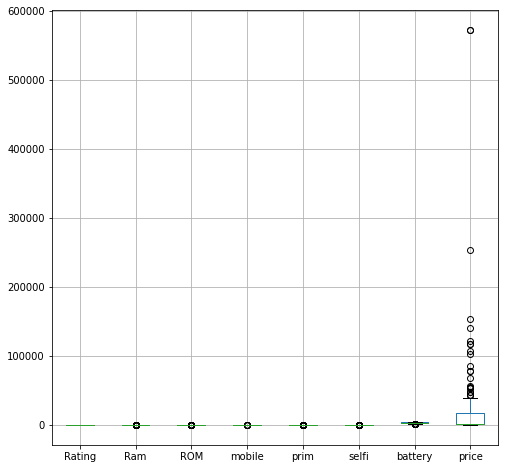

In [16]:
plt.figure(figsize=(8,8))
df.boxplot()
plt.show()

Corelation

In [17]:
corr = df.corr()
corr.shape

(8, 8)

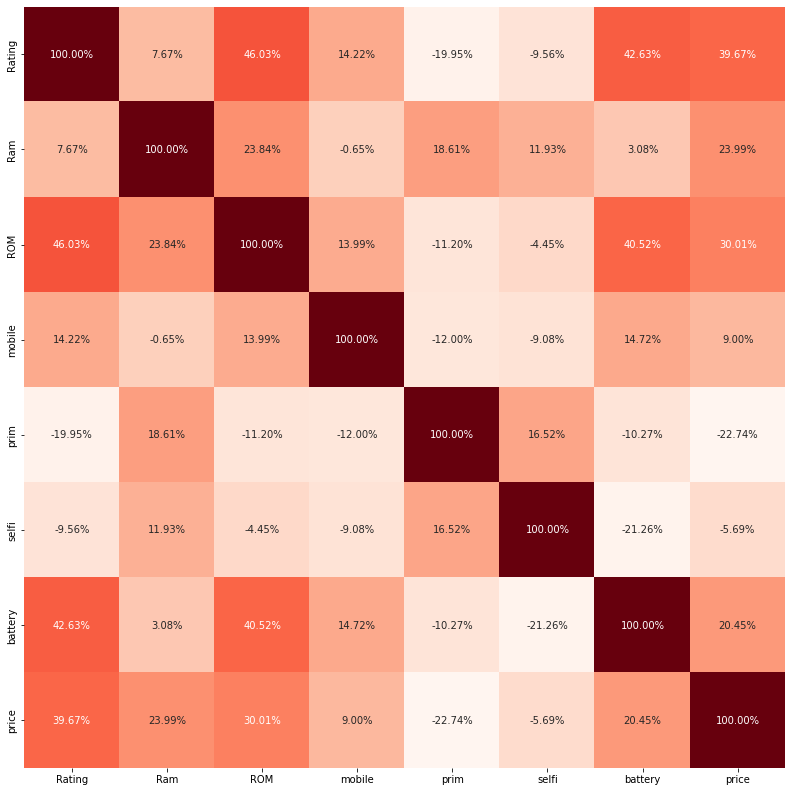

In [23]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Reds')

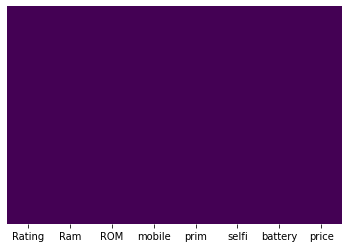

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

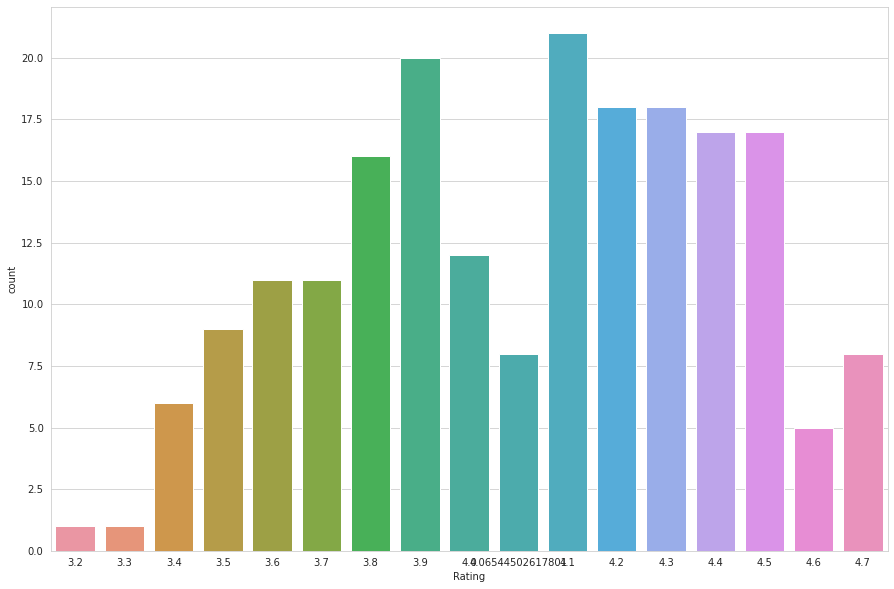

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Rating',data=df)

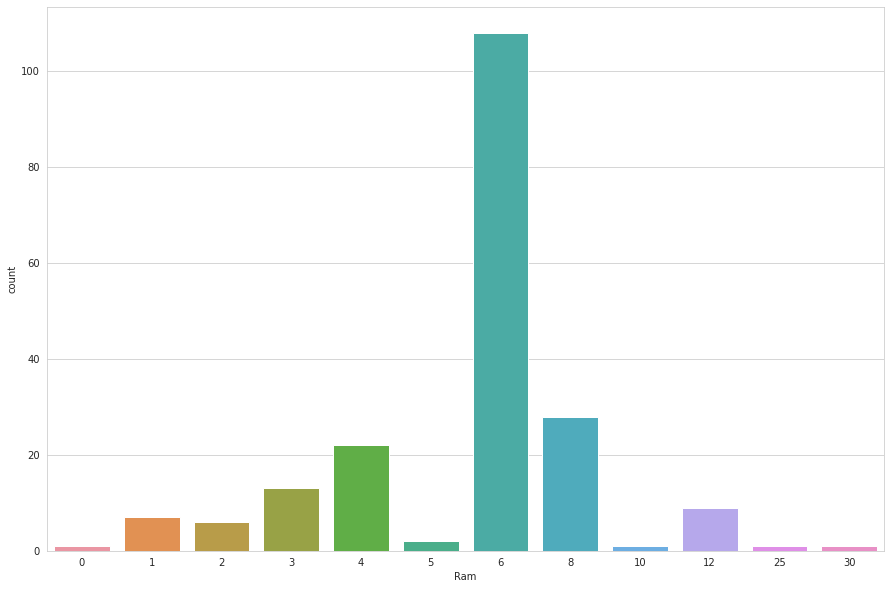

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Ram',data=df)

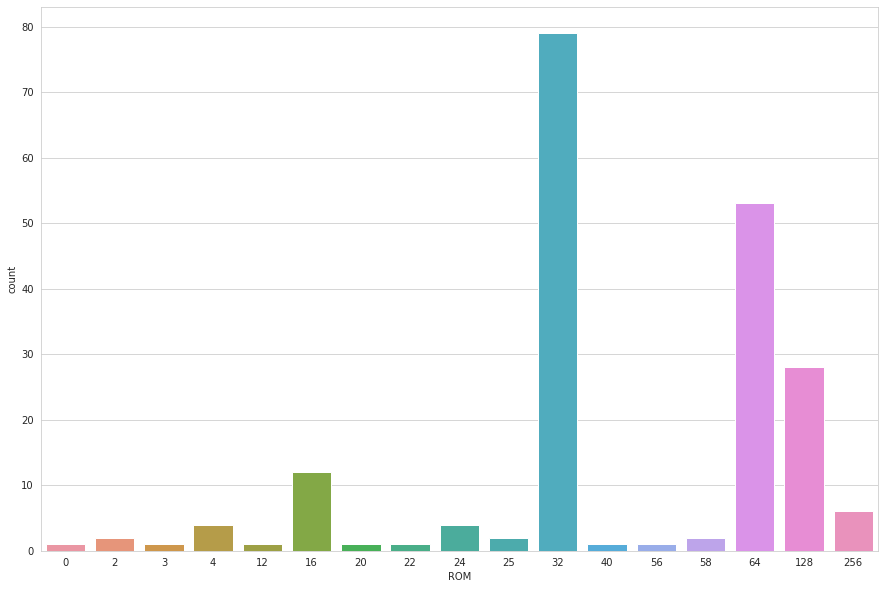

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='ROM',data=df)

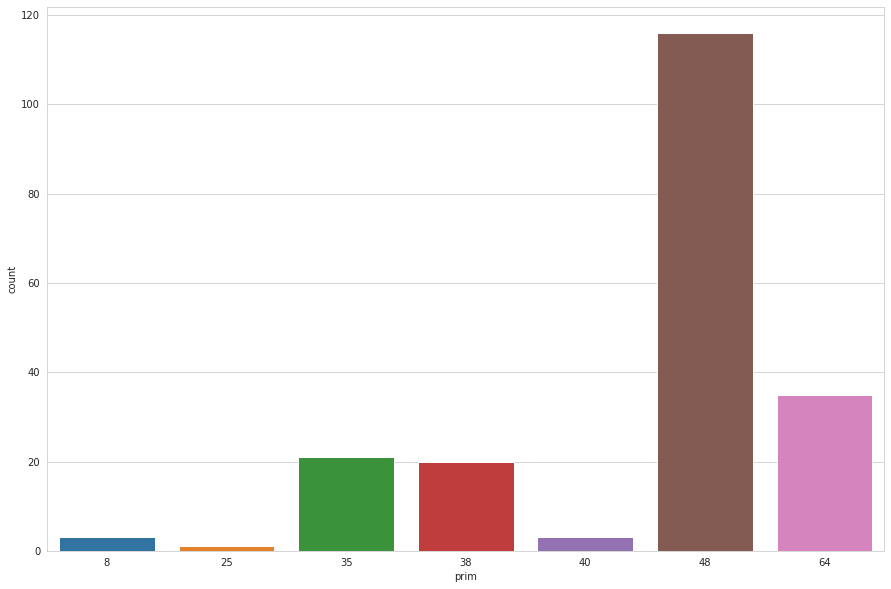

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='prim',data=df)

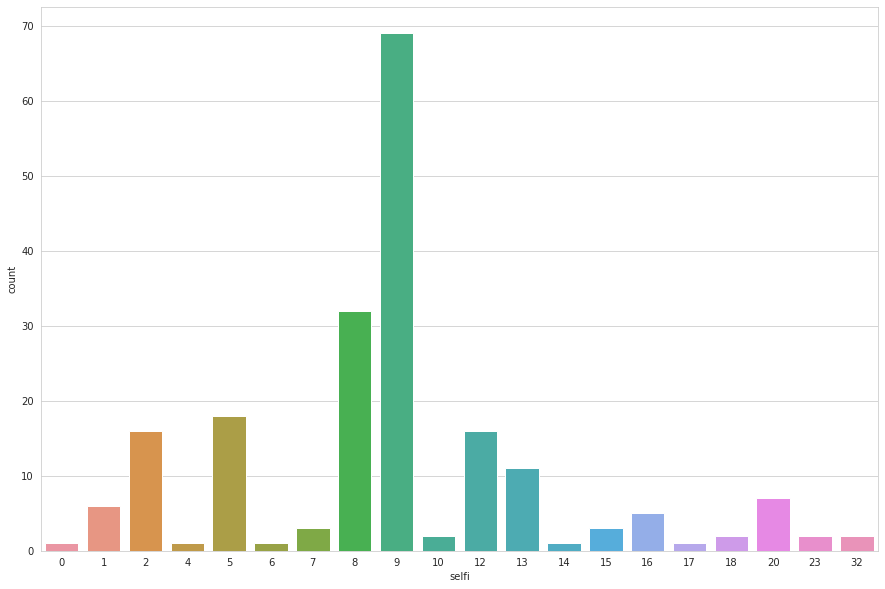

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='selfi',data=df)

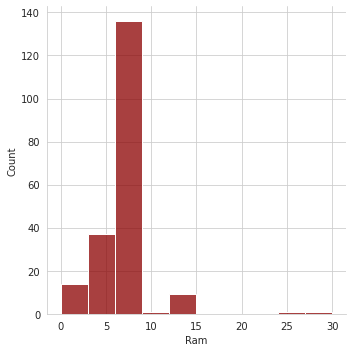

In [ ]:
sns.displot(df['Ram'].dropna(),kde=False,color='darkred',bins=10)

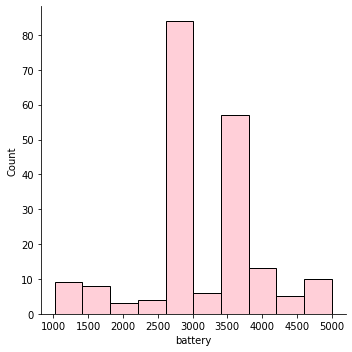

In [24]:
sns.displot(df['battery'].dropna(),kde=False,color='pink',bins=10)

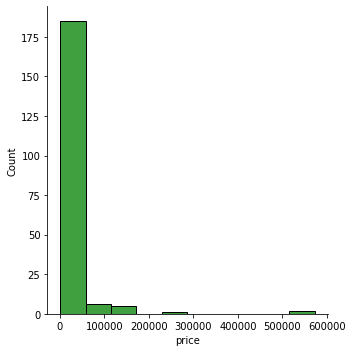

In [25]:
sns.displot(df['price'].dropna(),kde=False,color='green',bins=10)

<Figure size 720x720 with 0 Axes>

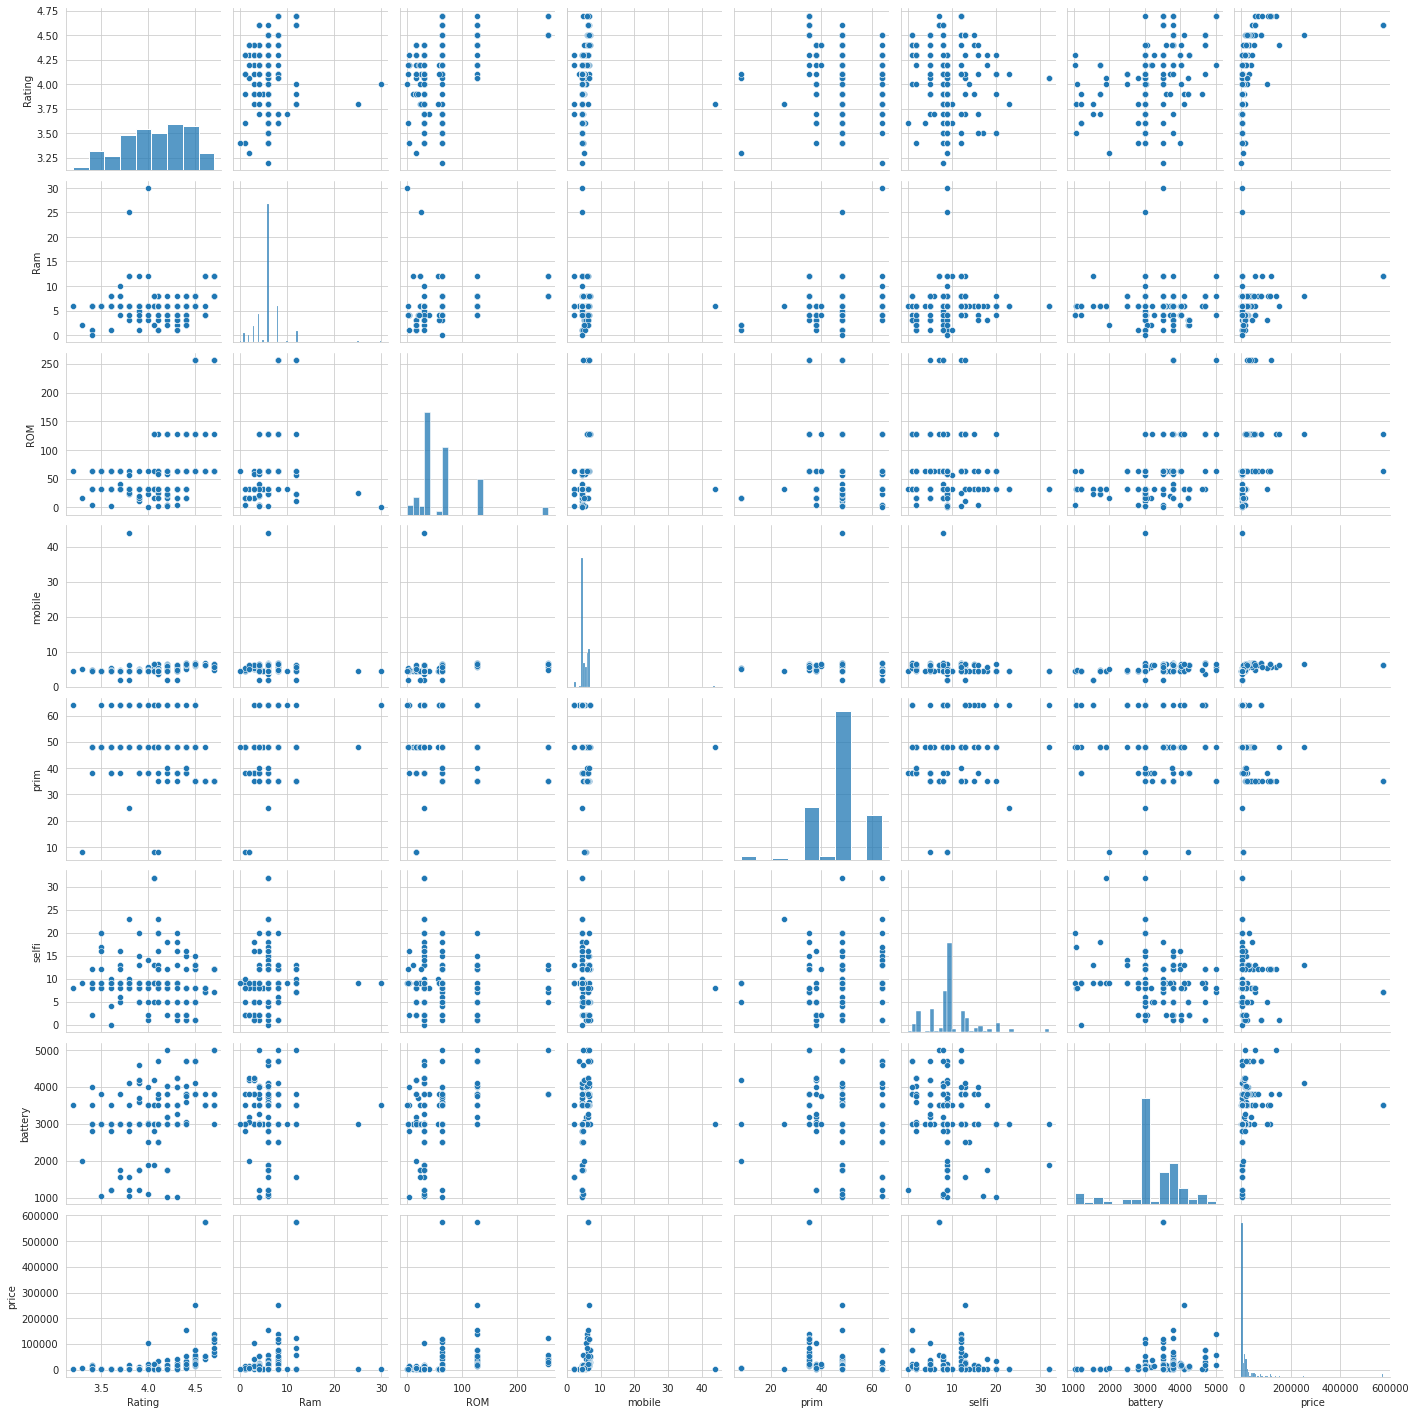

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [27]:
X = df.iloc[:,1:7] # Independent columns
y = df.iloc[:,[-1]] 

In [28]:
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [29]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,Ram,166.265226
1,ROM,7486.226124
2,mobile,314.196432
3,prim,353.268776
4,selfi,377.396390
5,battery,30700.531401


In [30]:
print(featureScores.nlargest(4,'Score'))

     Specs         Score
5  battery  30700.531401
1      ROM   7486.226124
4    selfi    377.396390
3     prim    353.268776


In [31]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier()

[0.13227609 0.11542142 0.23478986 0.08624482 0.2484759  0.18279192]


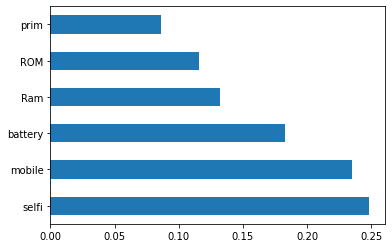

In [32]:
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [33]:
x = df.iloc[:,[6,2,4,5,1,3]]
y = df.iloc[:,[-1]]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=15)

# Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=8)
reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=8)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [37]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [38]:
y_pred = reg.predict(X_train)
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 89.78567123752363


In [39]:
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 71.80120496974583


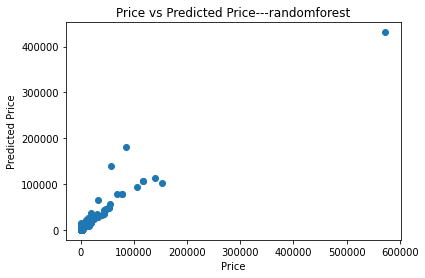

In [40]:
plt.scatter(y_train, y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price---randomforest")
plt.show()

In [41]:
y_pred = regressor.predict(X_train)
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 89.78567123752363


# Decision Tree Regression

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
dt=DecisionTreeRegressor(max_depth=8)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [44]:
dt.score(X_train,y_train)*100

99.97321872625884

In [45]:
dt.score(X_test,y_test)*100

80.7770669414388

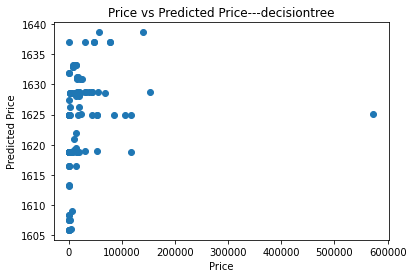

In [46]:
plt.scatter(y_train, y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price---decisiontree")
plt.show()

# K-Nearest-Neighbor

In [47]:
from sklearn.neighbors import KNeighborsClassifier  

In [48]:
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [49]:
y_pred_knn = model_knn.predict(X_test)  

In [50]:
model_knn.score(X_train,y_train)*100

37.58389261744966

In [51]:
model_knn.score(X_test,y_test)*100

0.0

# Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
model.score(X_train,y_train)*100

21.13333627356283

In [55]:
model.score(X_test,y_test)*100

13.536338055800456

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model=LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [58]:
model.score(X_train,y_train)*100

20.80536912751678

In [59]:
model.score(X_test,y_test)*100

6.0

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test)*100)
print(dt.score(X_train,y_train)*100)

82.54595434332796
99.99541131303735


# Accuracy

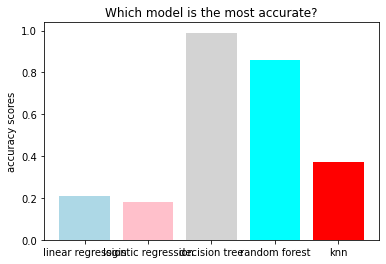

In [61]:
models = ['linear regression', 'logistic regression', 'decision tree', 'random forest', 'knn']
acc_scores = [0.21, 0.18, 0.99, 0.86, 0.37] 

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey', 'cyan', 'red'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

In [62]:
import pickle
pickle.dump(model,open('model.pkl','wb'))